In [30]:
import pandas as pd
import numpy as np
import gensim

import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import matplotlib.pyplot as plt
%matplotlib inline

# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('averaged_perceptron_tagger')

In [38]:
# scraped_data = pd.read_csv('./republic/republic_articles_final_v2.csv')
scraped_data = pd.read_excel('./republic/repub_tweet_final.xlsx')
scraped_data['time'] = pd.to_datetime(scraped_data['time'])
scraped_data = scraped_data[["title","content","retweet_count","favorite_count","Compound Sentiment Score","classification"]].dropna().reset_index(drop=True).copy()
print("Number of rows with any of the empty columns:\n",scraped_data.isnull().sum())
scraped_data.fillna(" ",inplace= True)
print("Dimensions:",scraped_data.shape)
scraped_data.head()

Number of rows with any of the empty columns:
 title                       0
content                     0
retweet_count               0
favorite_count              0
Compound Sentiment Score    0
classification              0
dtype: int64
Dimensions: (2196, 6)


,title,content,retweet_count,favorite_count,Compound Sentiment Score,classification
0,"Why Did Kerala Have A Backlog Of 7,000 COVID-1...",in a recent update to the covid situation in k...,3,6,0.9356,pos
1,Kerala Artist Creates 24-foot-long Theyyam's F...,a kerala based artist created an installation ...,2,14,0.9633,pos
2,'Govt as an enabler..': PM Modi Launches India...,modi modi on monday launched indian space sect...,4,27,0.9808,pos
3,"NEET Phase 2 Registration 2021 To End Today, H...",neet phase 2 registration national testing ag...,1,5,0.7351,pos
4,"'Leave immediately' | US, UK Issue Advisory; W...",the united states and britain on monday 11 oc...,2,11,-0.9753,neg


In [32]:
word_tokenizer=RegexpTokenizer(r'\w+')
wordnet_lemmatizer = WordNetLemmatizer()
stopwords_nltk=set(stopwords.words('english'))

In [33]:
def tokenize_text(version_desc: str)-> list:
    words = word_tokenizer.tokenize(wordnet_lemmatizer.lemmatize(version_desc.lower()))
    tokens = {word for word, tag in nltk.pos_tag(words) if tag in 'NN'}
    tokens = tokens.difference(stopwords_nltk) # removing stop-words
    # tokens = {x for x in tokens if not str(x).startswith("#")} # removing hashtags
    tokens = [x for x in tokens if str(x).isalpha()] # removing non-alpha's 
    return tokens

document = scraped_data["content"][15]
print(document,"\n")
print(tokenize_text(document))

ignou july admissions 2021  indira gandhi national open university is gearing up to conclude ignou july registration process soon  the registration process for ignou admissions 2021 in online distance learning courses and online programmes will conclude on monday  october 11  2021  earlier it was announced that the last day to fill application form was september 30  2021  however  ignou odl online program registration last day was extended due to some unavoidable reasons  all the interested candidates are advised to register themselves on the official website of ignou  ignou ac in   candidates are informed that the admission forms except for international students can be submitted online through the online admission system  candidates do not have to send the printed copy of application form to the regional centre  the steps to fill the registration form as well as the direct link to apply for ignou july admission 2021 have been mentioned here  candidates will have to pay an application

In [34]:
tokens = scraped_data["content"].apply(lambda x: tokenize_text(x))
tokens
# vec_words = CountVectorizer(tokenizer=tokenize_text,decode_error='ignore')
# total_features_words = vec_words.fit_transform(scraped_data["content"])
# total_features_words.shape

KeyboardInterrupt: 

# TF-IDF

In [ ]:
from gensim.models import TfidfModel
from gensim.corpora import Dictionary

dct = Dictionary(tokens)
dct.filter_extremes(no_below=50)  # fit dictionary
print(dct)
# print(dct.token2id)


Dictionary(526 unique tokens: ['act', 'administration', 'assembly', 'centre', 'control']...)


In [ ]:
corpus = [dct.doc2bow(line) for line in tokens]  # convert corpus to BoW format
model = TfidfModel(corpus)  # fit model
vector = model[corpus[0]]

## Tf-Idf weights

tried bi-grams....
nothing of importance

In [ ]:

# from gensim.utils import simple_preprocess, lemmatize
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s')
# logging.root.setLevel(level=logging.INFO)

In [ ]:
from gensim.models import LdaMulticore

n_topics = 8
lda_model = LdaMulticore(corpus=corpus,
                         id2word=dct,
                         random_state=1,
                         num_topics=int(n_topics),
                         passes=10,
                         chunksize=1000,
                         batch=False,
                         alpha='asymmetric',
                        #  decay=0.5,
                         offset=64,
                        #  eta=None,
                        #  eval_every=0,
                         iterations=500,
                        #  gamma_threshold=0.001,
                        #  per_word_topics=True
                         );

# save the model
lda_model.save('lda_model.model');

# See the topics
lda_model.print_topics(-1)

[(0,
  '0.016*"court" + 0.015*"case" + 0.010*"time" + 0.010*"mumbai" + 0.010*"police" + 0.009*"year" + 0.009*"day" + 0.009*"state" + 0.008*"government" + 0.008*"party"'),
 (1,
  '0.017*"government" + 0.015*"country" + 0.014*"year" + 0.013*"india" + 0.012*"state" + 0.010*"minister" + 0.010*"covid" + 0.010*"time" + 0.010*"september" + 0.008*"statement"'),
 (2,
  '0.020*"anniversary" + 0.018*"india" + 0.017*"year" + 0.016*"modi" + 0.016*"day" + 0.015*"country" + 0.015*"occasion" + 0.014*"birth" + 0.013*"gandhi" + 0.013*"nation"'),
 (3,
  '0.029*"match" + 0.026*"team" + 0.020*"time" + 0.018*"ipl" + 0.016*"game" + 0.015*"league" + 0.015*"cricket" + 0.014*"year" + 0.014*"ball" + 0.013*"season"'),
 (4,
  '0.019*"party" + 0.019*"congress" + 0.018*"minister" + 0.017*"cm" + 0.016*"state" + 0.016*"singh" + 0.015*"leader" + 0.014*"bjp" + 0.013*"union" + 0.013*"government"'),
 (5,
  '0.013*"year" + 0.010*"time" + 0.007*"country" + 0.007*"day" + 0.006*"control" + 0.006*"number" + 0.006*"director" + 

**Topic- 0:** International

**Topic- 1:** National

**Topic- 2:** Politics

**Topic- 3:** Law & Order

**Topic- 4:** Sports


In [ ]:
topics_df = pd.DataFrame([], columns=["title","content","topic"]+[i for i in range(0,n_topics)], index = scraped_data.index)

topics_df[["title","content"]] = scraped_data[["title","content"]]

topics_df.head(2)

,title,content,topic,0,1,2,3,4,5,6,7
0,"Why Did Kerala Have A Backlog Of 7,000 COVID-1...",in a recent update to the covid situation in k...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Kerala Artist Creates 24-foot-long Theyyam's F...,a kerala-based artist created an installation ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:

for index, bow in enumerate(corpus):
    topics = lda_model.get_document_topics(bow)
    for topic, probability in topics:
        topics_df[topic].iloc[index] = round(probability,2)
    topic_max = max(topics, key = lambda x: x[1])[0]
    topics_df["topic"].iloc[index] = topic_max
    # print(index)
    # print("Topic:",topic_max)
    # print(scraped_data["title"][index])
    # print()
topics_df = topics_df.fillna(0.0)
topics_df.head()

,title,content,topic,0,1,2,3,4,5,6,7
0,"Why Did Kerala Have A Backlog Of 7,000 COVID-1...",in a recent update to the covid situation in k...,1,0.00,0.98,0.00,0.0,0.0,0.0,0.0,0.00
1,Kerala Artist Creates 24-foot-long Theyyam's F...,a kerala-based artist created an installation ...,1,0.02,0.81,0.15,0.0,0.0,0.0,0.0,0.00
2,'Govt as an enabler..': PM Modi Launches India...,modi modi on monday launched indian space sect...,2,0.00,0.42,0.56,0.0,0.0,0.0,0.0,0.00
3,"NEET Phase 2 Registration 2021 To End Today, H...",neet phase 2 registration: national testing ag...,1,0.01,0.96,0.00,0.0,0.0,0.0,0.0,0.00
4,"'Leave immediately' | US, UK Issue Advisory; W...","the united states and britain on monday, 11 oc...",1,0.01,0.58,0.00,0.0,0.0,0.0,0.0,0.39


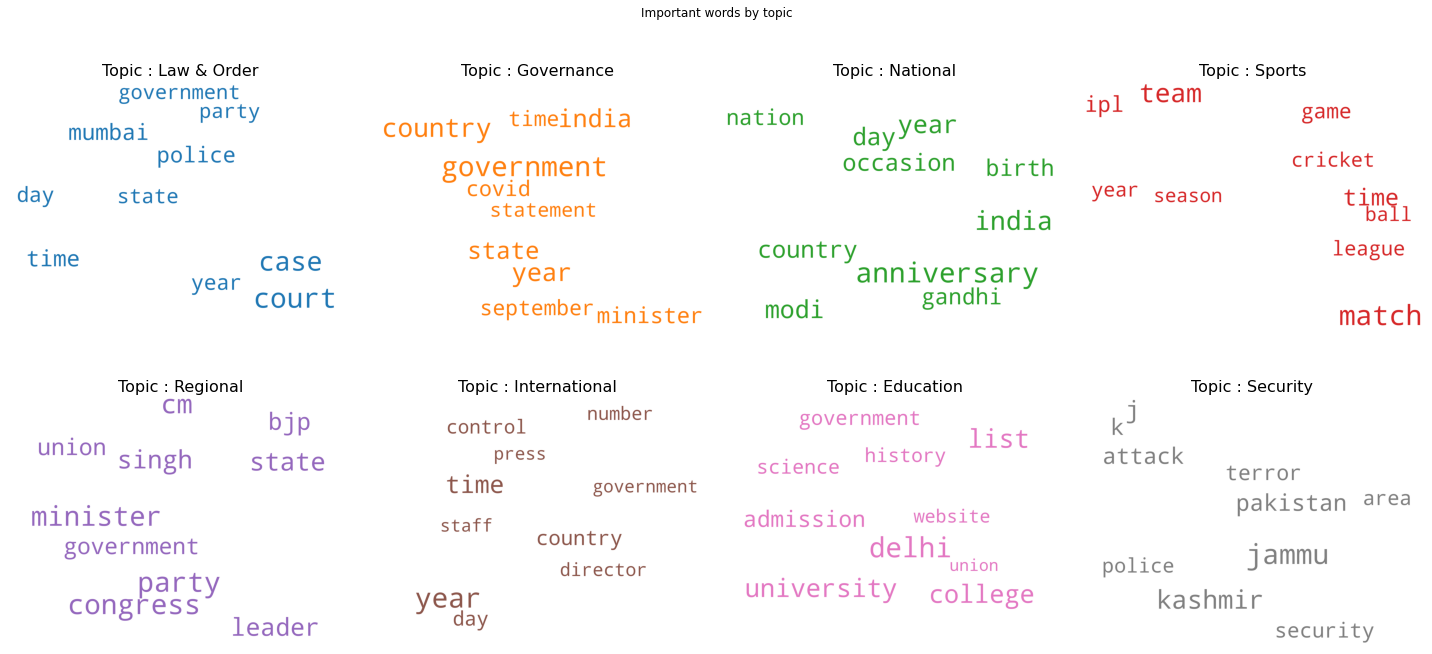

In [ ]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
topic_moniker = ['Law & Order',"Governance","National","Sports","Regional","International","Education","Security"]

cloud = WordCloud(stopwords=stopwords_nltk,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 4, sharex=True, sharey=True)

fig.set_size_inches((20,10), forward= True)
plt.suptitle("Important words by topic")

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=200)
    plt.imshow(cloud)
    ax.set_title('Topic : ' + str(topic_moniker[i]), fontdict=dict(size=16))
    plt.axis('off')

plt.axis('off')
plt.tight_layout()

plt.show()


In [ ]:
topics_df[[i for i in range(0,n_topics)]]

,0,1,2,3,4,5,6,7
0,0.00,0.98,0.00,0.00,0.0,0.0,0.0,0.00
1,0.02,0.81,0.15,0.00,0.0,0.0,0.0,0.00
2,0.00,0.42,0.56,0.00,0.0,0.0,0.0,0.00
3,0.01,0.96,0.00,0.00,0.0,0.0,0.0,0.00
4,0.01,0.58,0.00,0.00,0.0,0.0,0.0,0.39
...,...,...,...,...,...,...,...,...
2191,0.01,0.00,0.00,0.96,0.0,0.0,0.0,0.00
2192,0.54,0.42,0.00,0.00,0.0,0.0,0.0,0.00
2193,0.00,0.00,0.00,0.98,0.0,0.0,0.0,0.00
2194,0.83,0.14,0.00,0.00,0.0,0.0,0.0,0.00


In [39]:
scraped_data["topic"] = topics_df["topic"]
scraped_data.head(2)

,title,content,retweet_count,favorite_count,Compound Sentiment Score,classification,topic
0,"Why Did Kerala Have A Backlog Of 7,000 COVID-1...",in a recent update to the covid situation in k...,3,6,0.9356,pos,1
1,Kerala Artist Creates 24-foot-long Theyyam's F...,a kerala based artist created an installation ...,2,14,0.9633,pos,1


In [ ]:
# Get topic weights and dominant topics ------------from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
from sklearn.manifold import TSNE

tsne_model = TSNE(n_components=2, random_state=100, angle=0.9, init='pca');
tsne_lda = tsne_model.fit_transform(topics_df[[i for i in range(0,n_topics)]]);# Plot the Topic Clusters using Bokeh
output_notebook();

mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topics_df["topic"]]);

show(plot)



/Users/rchaks/opt/anaconda3/envs/barua_proj/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/rchaks/opt/anaconda3/envs/barua_proj/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


Loading BokehJS ...

In [ ]:
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary=lda_model.id2word);
vis

/Users/rchaks/opt/anaconda3/envs/barua_proj/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(
/Users/rchaks/opt/anaconda3/envs/barua_proj/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/rchaks/opt/anaconda3/envs/barua_proj/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/rchaks/opt/anaconda3/envs/barua_proj/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.015130  0.089148       1        1  35.869041
4     -0.108320 -0.123920       2        1  29.487627
0      0.006976 -0.027953       3        1  14.293846
3      0.203059 -0.028967       4        1  10.798019
2     -0.026809  0.033446       5        1   4.667367
7     -0.080460  0.063530       6        1   3.936893
6      0.000584 -0.006012       7        1   0.527515
5      0.020100  0.000727       8        1   0.419692, topic_info=           Term        Freq       Total Category  logprob  loglift
32         year  664.000000  664.000000  Default  30.0000  30.0000
10   government  803.000000  803.000000  Default  29.0000  29.0000
173       delhi  365.000000  365.000000  Default  28.0000  28.0000
69         time  618.000000  618.000000  Default  27.0000  27.0000
88      country  530.000000  530.000000  Default  26.0000  26.0000
..          ...         ...         ...      ...      ...      ...
21     minister    1.101009  721.151056   Topic8  -5.5175  -1.0112
11        group    1.064106  229.564930   Topic8  -5.5516   0.0994
27        state    1.076055  725.243878   Topic8  -5.5404  -1.0398
147       chief    1.055767  375.342350   Topic8  -5.5594  -0.4002
197        area    1.048061  192.438056   Topic8  -5.5668   0.2606

[436 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
0         1  0.264505    act
0         2  0.241167    act
0         3  0.388979    act
0         4  0.015559    act
0         5  0.038898    act
...     ...       ...    ...
190       2  0.465974  youth
190       3  0.116493  youth
190       4  0.043685  youth
190       5  0.014562  youth
190       6  0.131055  youth

[2015 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 1, 4, 3, 8, 7, 6])

In [ ]:
t = topics_df[[i for i in range(0,n_topics)]]
t

,0,1,2,3,4,5,6,7
0,0.00,0.98,0.00,0.00,0.0,0.0,0.0,0.00
1,0.02,0.81,0.15,0.00,0.0,0.0,0.0,0.00
2,0.00,0.42,0.56,0.00,0.0,0.0,0.0,0.00
3,0.01,0.96,0.00,0.00,0.0,0.0,0.0,0.00
4,0.01,0.58,0.00,0.00,0.0,0.0,0.0,0.39
...,...,...,...,...,...,...,...,...
2191,0.01,0.00,0.00,0.96,0.0,0.0,0.0,0.00
2192,0.54,0.42,0.00,0.00,0.0,0.0,0.0,0.00
2193,0.00,0.00,0.00,0.98,0.0,0.0,0.0,0.00
2194,0.83,0.14,0.00,0.00,0.0,0.0,0.0,0.00


In [ ]:
import sklearn
pca = sklearn.decomposition.PCA(n_components = 3)
x = pd.DataFrame(pca.fit_transform(t), index=t.index, columns=[0,1,2])
x["topics"] = topics_df["topic"]
x[0:5]

,0,1,2,topics
0,-0.625000,-0.132945,-0.042935,1
1,-0.477550,-0.075593,-0.015410,1
2,-0.146592,0.035208,-0.001850,2
3,-0.607018,-0.124038,-0.034092,1
4,-0.284086,-0.008138,-0.005798,1


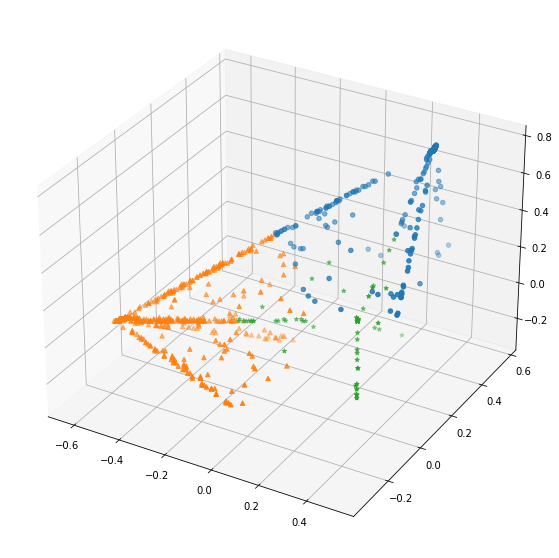

In [ ]:
fig = plt.figure()
fig.set_size_inches((20,10))
ax = fig.add_subplot(projection='3d')

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
m = ['o','^','*']
for i in range(0,3):
    b = x[topics_df['topic'] == i]
    ax.scatter(b[0], b[1], b[2], marker = m[i])
plt.show()

In [ ]:
for index, item in topics_df.groupby(["topic"]):
    print("\n",index)
    for idx, stuff in item[:10].iterrows():
        print(stuff["title"])


 0
Dubai Police Nabs Israeli Man Allegedly Smuggling 500 Kg Pure Cocaine Worth $136 Million
Extortion case: CBI Raids Anil Deshmukh's Premises In Nagpur; Likely To Summon Ex-Maharashtra Home Min
Congress Demands Action Against Perpetrators Post clashes Between 2 Groups In MP's Indore
Urban Company To Enhance Partners' Earnings Amid Beauticians' Protest, Issues Statement
Delhi: Massive Fire Breaks Out At Paper Godown In Harsh Vihar, No Injuries Reported
RSS Chief Mohan Bhagwat Slams The West For Rising Drug Trend In Indians Amid NCB Crackdown
Maharashtra Bandh update Maharashtra Bandh: Local Trains And Essential Services Operating, Informs Mumbai Police
Poland: Tens Of Thousands Take Part In Pro-European Protests Amid 'Polexit' Alarm
Priti Patel Miffed With UK PM Boris Johnson Squashing Sexual Harassment Law: Report
'Just saying': Amid Aryan Khan's Case, Kangana Ranaut Highlights Jackie Chan Apologising For Son's Arrest

 1
Why Did Kerala Have A Backlog Of 7,000 COVID-19 deaths? NTAGI 

In [46]:
df = scraped_data.copy()
# df.Vader_Analysis = df.Vader_Analysis == "Positive"
df["topic"] = df["topic"].apply(lambda x: (topic_moniker[x]))
df

,title,content,retweet_count,favorite_count,Compound Sentiment Score,classification,topic
0,"Why Did Kerala Have A Backlog Of 7,000 COVID-1...",in a recent update to the covid situation in k...,3,6,0.9356,pos,Governance
1,Kerala Artist Creates 24-foot-long Theyyam's F...,a kerala based artist created an installation ...,2,14,0.9633,pos,Governance
2,'Govt as an enabler..': PM Modi Launches India...,modi modi on monday launched indian space sect...,4,27,0.9808,pos,National
3,"NEET Phase 2 Registration 2021 To End Today, H...",neet phase 2 registration national testing ag...,1,5,0.7351,pos,Governance
4,"'Leave immediately' | US, UK Issue Advisory; W...",the united states and britain on monday 11 oc...,2,11,-0.9753,neg,Governance
...,...,...,...,...,...,...,...
2191,Lewis Hamilton Pens Emotional Post After Winni...,it turned out to be a memorable day for lewis ...,2,19,0.9923,pos,Sports
2192,'Matter Of Right': CJI Ramana Says India Needs...,chief justice of india nv ramana on sunday enc...,9,60,0.9753,pos,Law & Order
2193,IPL 2021 Points Table Update: Top Teams On Poi...,the second phase of the indian premier league ...,2,19,0.9909,pos,Sports
2194,Ashok Gehlot's Brother Agrasen Summoned By ED ...,the enforcement directorate on monday summoned...,4,39,-0.9451,neg,Law & Order


In [61]:
print("Sentiment Analysis, Republic")
sentiment_topic = df.groupby(["topic","classification"])["Compound Sentiment Score"].agg(["count"]).unstack().fillna(0)
sentiment_topic.to_csv("Republic_Sentiment.csv")
sentiment_topic

Sentiment Analysis, Republic


count       
classification    neg    pos
topic                       
Education         5.0    7.0
Governance      373.0  583.0
International     3.0    0.0
Law & Order     209.0   96.0
National         22.0   60.0
Regional        281.0  203.0
Security         64.0    3.0
Sports           26.0  261.0

In [73]:
print("Engagement Analysis, Republic")
engagement_topic = df.groupby(["topic","classification"])["retweet_count","favorite_count"].agg(["mean"]).unstack().fillna(0)
engagement_topic = engagement_topic/2.5
engagement_topic.to_csv("Republic_Engagement.csv")
engagement_topic

Engagement Analysis, Republic


/var/folders/y3/v6fyb_rs72bcn7ftc3lvwvmw0000gn/T/ipykernel_29637/367951887.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  engagement_topic = df.groupby(["topic","classification"])["retweet_count","favorite_count"].agg(["mean"]).unstack().fillna(0)


retweet_count           favorite_count           
                        mean                     mean           
classification           neg       pos            neg        pos
topic                                                           
Education           1.440000  0.400000       6.480000   8.742857
Governance          2.190885  2.315609      15.962466  20.277873
International       2.133333  0.000000      11.200000   0.000000
Law & Order         6.752153  5.700000      39.343541  39.225000
National            4.527273  3.386667      40.363636  30.440000
Regional            3.158719  2.591133      25.958719  25.040394
Security            5.512500  1.866667      31.656250  18.666667
Sports              1.584615  1.397701      15.676923  15.739464

In [72]:
analysis = df.groupby(["topic"]).agg({
                                "Compound Sentiment Score":"count",
                                "retweet_count":"mean",
                                "favorite_count":"mean"
                              }).fillna(0)
analysis[["retweet_count","favorite_count"]] = analysis[["retweet_count","favorite_count"]]/2.5
analysis.to_csv("republic_analysis_overall.csv")
analysis

,Compound Sentiment Score,retweet_count,favorite_count
topic,,,
Education,12,0.833333,7.800000
Governance,956,2.266946,18.594142
International,3,2.133333,11.200000
Law & Order,305,6.420984,39.306230
National,82,3.692683,33.102439
Regional,484,2.920661,25.573554
Security,67,5.349254,31.074627
Sports,287,1.414634,15.733798
